In [26]:
import pandas as pd
import numpy as np
import json

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score
from sklearn.metrics import average_precision_score,plot_precision_recall_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve, auc

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.decomposition import PCA

import clean_text as ct
from gensim.models import KeyedVectors, Word2Vec
from sklearn.linear_model import LogisticRegression

In [115]:
tweets = pd.read_csv('climate_change_tweets_sample-2020-05-16-17-57.csv')
tweets.head()

,username,user_handle,date,retweets,favorites,text,label
0,WWF Climate & Energy,climateWWF,2020-04-28,11,22,Economic recovery and national climate pledges...,0
1,WWF Climate & Energy,climateWWF,2020-04-22,6,16,"In this difficult time, it’s hard to connect w...",0
2,WWF Climate & Energy,climateWWF,2020-04-01,43,69,"The decision to postpone # COP26, is unavoidab...",0
3,WWF Climate & Energy,climateWWF,2020-03-30,24,30,Japan - the world’s fifth largest emitter of g...,0
4,WWF Climate & Energy,climateWWF,2020-03-30,22,40,How can countries include # NatureBasedSolutio...,0


In [116]:
# clean_text = ct.CleanText()
# tweets["text"] = clean_text.transform_no_stem(tweets.text)
# tweets.to_csv("clean_tweets_no_stemming.csv") # save once processed

tweets = pd.read_csv("clean_tweets_no_stemming.csv") # read in instead
tweets = tweets.loc[(~tweets.text.isnull()), :]
tweets.head()

,Unnamed: 0,username,user_handle,date,retweets,favorites,text,label
0,0,WWF Climate & Energy,climateWWF,2020-04-28,11,22,economic recovery national climate pledges mus...,0
1,1,WWF Climate & Energy,climateWWF,2020-04-22,6,16,difficult time hard connect natural world eart...,0
2,2,WWF Climate & Energy,climateWWF,2020-04-01,43,69,decision postpone cop unavoidable collective p...,0
3,3,WWF Climate & Energy,climateWWF,2020-03-30,24,30,japan worlds fifth largest emitter greenhouse ...,0
4,4,WWF Climate & Energy,climateWWF,2020-03-30,22,40,countries include naturebasedsolutions climate...,0


#### Embedder

In [6]:
###you have to download the pre-trained vectorizer at: https://fasttext.cc/docs/en/english-vectors.html

model = 'wiki-news-300d-1M.vec'

model_emb = KeyedVectors.load_word2vec_format(model, binary=False)

# import gensim.downloader as api
# model_emb = api.load(model)

In [117]:
def Word2VectorizeTweet(tweet):
    tweet_vector = np.zeros(shape=(300,), dtype="float32")
    n_vectorizable = 0
    for word in tweet.split():
        try:
#             print(f"Adding {word} to word representation")
            tweet_vector = np.add(tweet_vector, model_emb.get_vector(word))
            n_vectorizable += 1
        except KeyError:
            print(f"Could not vectorize {word}")
    return (tweet_vector/n_vectorizable)

In [118]:
tweets["FastText"] = tweets.text.apply(func=Word2VectorizeTweet)

Could not vectorize manupulgarvidal
Could not vectorize petersbergclimatedialogue
Could not vectorize bmu
Could not vectorize christoph
Could not vectorize earthday
Could not vectorize manupulgarvidal
Could not vectorize wwfmedia
Could not vectorize vperezcirera
Could not vectorize climateaction
Could not vectorize manupulgarvidal
Could not vectorize naturebasedsolutions
Could not vectorize ndcs
Could not vectorize worldwildlife
Could not vectorize climateambition
Could not vectorize wwfjapan
Could not vectorize manupulgarvidal
Could not vectorize ndcs
Could not vectorize climateaction
Could not vectorize manupulgarvidal
Could not vectorize vperezcirera
Could not vectorize naturedeal
Could not vectorize ndcs
Could not vectorize climatecrisis
Could not vectorize wwfmedia
Could not vectorize manupulgarvidal
Could not vectorize vperezcirera
Could not vectorize wwfjapan
Could not vectorize climateambition
Could not vectorize topnigel
Could not vectorize climatewwf
Could not vectorize gmuno

Could not vectorize gcfnews
Could not vectorize ccnow
Could not vectorize worldbank
Could not vectorize sdgs
Could not vectorize youthday
Could not vectorize climateaction
Could not vectorize helhaitecop
Could not vectorize climateaction
Could not vectorize icao
Could not vectorize undp
Could not vectorize parisagreement
Could not vectorize nazcaportal
Could not vectorize cnnow
Could not vectorize marrakech
Could not vectorize actonclimate
Could not vectorize laurencetubiana
Could not vectorize parisagreement
Could not vectorize pikclimate
Could not vectorize climatehome
Could not vectorize solarimpulse
Could not vectorize solarenergy
Could not vectorize aodproject
Could not vectorize unep
Could not vectorize petersberg
Could not vectorize parisagreement
Could not vectorize petersberg
Could not vectorize hakimaelhaite
Could not vectorize petersberg
Could not vectorize parisagreement
Could not vectorize parisagreement
Could not vectorize faoknowledge
Could not vectorize parisagreement
C

Could not vectorize morningjoe
Could not vectorize morningjoe
Could not vectorize morningmika
Could not vectorize joeyscarborough
Could not vectorize williegeist
Could not vectorize dwallacewells
Could not vectorize broecker
Could not vectorize sarahkaplan
Could not vectorize alexandriav
Could not vectorize gretathunberg
Could not vectorize meganherbert
Could not vectorize tantrumbook
Could not vectorize sciam
Could not vectorize charlesppierce
Could not vectorize franciediep
Could not vectorize marlene
Could not vectorize cimons
Could not vectorize randyshowstack
Could not vectorize theagu
Could not vectorize agueos
Could not vectorize mihai
Could not vectorize mareacaspica
Could not vectorize trumpological
Could not vectorize maserati
Could not vectorize thebriefingroom
Could not vectorize greennewdeal
Could not vectorize polarvortex
Could not vectorize ireallapscience
Could not vectorize sotu
Could not vectorize corbettjessica
Could not vectorize sotu
Could not vectorize katyturnbc


Could not vectorize climatevoter
Could not vectorize appalachia
Could not vectorize priceofoil
Could not vectorize cfigueres
Could not vectorize nextsg
Could not vectorize climatehome
Could not vectorize andrewbeebe
Could not vectorize denierdonald
Could not vectorize denierdonald
Could not vectorize realdonaldtrump
Could not vectorize realdonaldtrump
Could not vectorize sierraclub
Could not vectorize tomsteyer
Could not vectorize mayboeve
Could not vectorize vanjones
Could not vectorize rheasuh
Could not vectorize realdonaldtrump
Could not vectorize seiu
Could not vectorize sierraclub
Could not vectorize huffpostpol
Could not vectorize nevertrump
Could not vectorize sierraclub
Could not vectorize nuccitelli
Could not vectorize lenamdc
Could not vectorize buttrumpdoesnt
Could not vectorize warrenbuffett
Could not vectorize nkus
Could not vectorize insideclimate
Could not vectorize climatehome
Could not vectorize floridas
Could not vectorize mayoredmurray
Could not vectorize sierraclub


Could not vectorize thefuturewewant
Could not vectorize fridaysforfuture
Could not vectorize howdareyou
Could not vectorize fridaysforfuture
Could not vectorize merkeltellthetruth
Could not vectorize merkeltellthetruth
Could not vectorize globalclimatestrike
Could not vectorize globalclimatestrike
Could not vectorize fridaysforfuture
Could not vectorize writersforfuture
Could not vectorize kolloquium
Could not vectorize klettcottatweet
Could not vectorize tropenverlag
Could not vectorize globalen
Could not vectorize klimastreik
Could not vectorize raisedfist
Could not vectorize climateactionchallenge
Could not vectorize climatehuman
Could not vectorize stephenathome
Could not vectorize victoryhand
Could not vectorize donnerstag
Could not vectorize inspirierenden
Could not vectorize aktivist
Could not vectorize kirchentag
Could not vectorize kontrastprogramm
Could not vectorize occupyingforclimate
Could not vectorize altiero
Could not vectorize spinelli
Could not vectorize fridaysforfut

Could not vectorize markruffalo
Could not vectorize coppresident
Could not vectorize pathbalance
Could not vectorize onemillionofus
Could not vectorize climatetwitter
Could not vectorize fridaysfuture
Could not vectorize fridaysforfuture
Could not vectorize strikewithus
Could not vectorize gretathunberg
Could not vectorize vanessavash
Could not vectorize earthdaynetwork
Could not vectorize myclimatestrikeprofile
Could not vectorize vanessavash
Could not vectorize vanessavash
Could not vectorize gretathunberg
Could not vectorize jamiemargolin
Could not vectorize eisenstadtari
Could not vectorize onemillionofus
Could not vectorize climatechangeeducationact
Could not vectorize fridaysforfuture
Could not vectorize gretathunberg
Could not vectorize platyperry
Could not vectorize lulspacebby
Could not vectorize xrebeldc
Could not vectorize eisenstadtari
Could not vectorize riseupmovement
Could not vectorize firedrillfriday
Could not vectorize onemillionofus
Could not vectorize gretathunberg


Could not vectorize fossilfreeworld
Could not vectorize uniteforclimate
Could not vectorize generationz
Could not vectorize climatejobsjustice
Could not vectorize wemarch
Could not vectorize theactionnet
Could not vectorize reporterclimate
Could not vectorize californias
Could not vectorize dicaprio
Could not vectorize powershift
Could not vectorize powershiftnet
Could not vectorize reporterclimate
Could not vectorize amazingwhy
Could not vectorize xolbron
Could not vectorize wla
Could not vectorize changeits
Could not vectorize dicaprios
Could not vectorize dicaprios
Could not vectorize covid
Could not vectorize covid
Could not vectorize natgeoscience
Could not vectorize natgeomag
Could not vectorize natgeomag
Could not vectorize natgeoscience
Could not vectorize earthand
Could not vectorize natgeo
Could not vectorize natgeo
Could not vectorize natgeo
Could not vectorize natgeomag
Could not vectorize natgeo
Could not vectorize methanehere
Could not vectorize natgeo
Could not vectorize

Could not vectorize alejand
Could not vectorize amazonrainforest
Could not vectorize thisiszerohour
Could not vectorize thisiszerohour
Could not vectorize globeshowingamericas
Could not vectorize youthclimatesummit
Could not vectorize thisiszerohour
Could not vectorize youthvgov
Could not vectorize climaterecoveryplan
Could not vectorize globeshowingamericas
Could not vectorize thisiszerohour
Could not vectorize youthvgovwa
Could not vectorize youthtopower
Could not vectorize sunvalley
Could not vectorize sunvalleyidaho
Could not vectorize youthvgov
Could not vectorize youthvgovwa
Could not vectorize hotgirlsummer
Could not vectorize hotgirlplanet
Could not vectorize theestallion
Could not vectorize lilnasx
Could not vectorize thisiszerohour
Could not vectorize teenvogue
Could not vectorize thisiszerohour
Could not vectorize tedios
Could not vectorize theestallion
Could not vectorize youthclimatemarch
Could not vectorize winkingface
Could not vectorize thisiszerohour
Could not vectoriz

Could not vectorize ericachenoweth
Could not vectorize firedrillfriday
Could not vectorize fridayforfuture
Could not vectorize berniesanders
Could not vectorize moritz
Could not vectorize fridaysforfuture
Could not vectorize pseumd
Could not vectorize washingtondc
Could not vectorize backhandindexpointingdown
Could not vectorize washingtondc
Could not vectorize fridaysforfuture
Could not vectorize firedrillfridays
Could not vectorize electionday
Could not vectorize ferc
Could not vectorize backhandindexpointingdown
Could not vectorize sohananasrin
Could not vectorize icymi
Could not vectorize scienceadvances
Could not vectorize americanresistanceunitedstates
Could not vectorize janefonda
Could not vectorize theresistance
Could not vectorize davidsmeyer
Could not vectorize tarrow
Could not vectorize monkeycageblog
Could not vectorize womensmarch
Could not vectorize directaction
Could not vectorize climatestrike
Could not vectorize upuparrow
Could not vectorize americanresistanceunitedst

Could not vectorize jfarrell
Could not vectorize peterjjacques
Could not vectorize nationalclimateassessment
Could not vectorize trumpadministration
Could not vectorize fallingbehind
Could not vectorize greennewdeal
Could not vectorize chrislhayes
Could not vectorize justasking
Could not vectorize drvox
Could not vectorize dinograndoni
Could not vectorize fossilfuel
Could not vectorize cleanenergy
Could not vectorize voxdotcom
Could not vectorize powershift
Could not vectorize energyaction
Could not vectorize drvox
Could not vectorize amyaharder
Could not vectorize sominisengupta
Could not vectorize echochambers
Could not vectorize hoffmanandy
Could not vectorize conversationus
Could not vectorize climatehawkvote
Could not vectorize backhandindexpointingdown
Could not vectorize trumpadministration
Could not vectorize seanastin
Could not vectorize seanastin
Could not vectorize socialscientists
Could not vectorize pearlharbor
Could not vectorize ipccreport
Could not vectorize echochamber

Could not vectorize voxdotcom
Could not vectorize drvox
Could not vectorize voxdotcom
Could not vectorize drvox
Could not vectorize nextgenclimate
Could not vectorize nbcnews
Could not vectorize climateprogress
Could not vectorize deanarohlinger
Could not vectorize panelon
Could not vectorize raulpacheco
Could not vectorize greenprofgreen
Could not vectorize envdefensefund
Could not vectorize wmonews
Could not vectorize ssnscholars
Could not vectorize echochambers
Could not vectorize nojargonpodcast
Could not vectorize pseumd
Could not vectorize joewaggle
Could not vectorize lorienjasny
Could not vectorize asanews
Could not vectorize bsosumd
Could not vectorize socyumd
Could not vectorize pseumd
Could not vectorize shesource
Could not vectorize natureclimate
Could not vectorize joewaggle
Could not vectorize lorienjasny
Could not vectorize umdrightnow
Could not vectorize revkin
Could not vectorize issuesinst
Could not vectorize creativenonfict
Could not vectorize echochambers
Could not 

Could not vectorize climatedepot
Could not vectorize dailysignal
Could not vectorize bbcbreakfast
Could not vectorize billtrademarks
Could not vectorize bbcbreakfast
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize canadatrademarks
Could not vectorize bbcbreakfast
Could not vectorize bbcbreakfast
Could not vectorize bbcbreakfast
Could not vectorize impossibletrademark
Could not vectorize bbcbreakfast
Could not vectorize fraudtrademark
Could not vectorize johnsullivanp
Could not vectorize brinktrademark
Could not vectorize delingpole
Could not vectorize breitbartnews
Could not vectorize untrademarks
Could not vectorize johnsullivanp
Could not vectorize australiatrademarks
Could not vectorize bbcbreakfast
Could not vectorize bbcbreakfast
Could not vectorize issuetrademark
Could not vectorize bbcbreakfast
Could not vectorize johnsullivanp
Could not vectorize weathertrademark
Could not vectorize bbcbreakfast
Could not vectorize bbcbreakfast
Could not vectorize 

Could not vectorize burgerstrademark
Could not vectorize patchtrademark
Could not vectorize bbcnews
Could not vectorize breitbartnews
Could not vectorize bbcnews
Could not vectorize naturetrademarks
Could not vectorize earthtrademarks
Could not vectorize thoughttrademark
Could not vectorize bbcnews
Could not vectorize bbcbreakfast
Could not vectorize icelandtrademarks
Could not vectorize glaciertrademark
Could not vectorize johnsullivanp
Could not vectorize johnsullivanp
Could not vectorize defendanttrademarks
Could not vectorize johnsullivanp
Could not vectorize johnsullivanp
Could not vectorize johnsullivanp
Could not vectorize earthtrademarks
Could not vectorize johnsullivanp
Could not vectorize trumptrademarks
Could not vectorize johnsullivanp
Could not vectorize ibdeditorials
Could not vectorize warriorstrademark
Could not vectorize changetrademark
Could not vectorize wmo
Could not vectorize bbcnews
Could not vectorize johnsullivanp
Could not vectorize johnsullivanp
Could not vect

Could not vectorize kurbjun
Could not vectorize climaterealists
Could not vectorize heartlander
Could not vectorize mckillop
Could not vectorize wordpressdotcom
Could not vectorize climaterealists
Could not vectorize climatedepot
Could not vectorize iccc
Could not vectorize heartlander
Could not vectorize climatedepot
Could not vectorize svensmark
Could not vectorize kilimanjaro
Could not vectorize climatedepot
Could not vectorize wattsupwiththat
Could not vectorize gernany
Could not vectorize svensmark
Could not vectorize climatedepot
Could not vectorize heartlander
Could not vectorize justicetrademark
Could not vectorize nasagiss
Could not vectorize aftenbladet
Could not vectorize climaterealists
Could not vectorize spiegelonline
Could not vectorize climaterealists
Could not vectorize lovelock
Could not vectorize climatedepot
Could not vectorize immunitygate
Could not vectorize climaterealists
Could not vectorize nevado
Could not vectorize climaterealists
Could not vectorize mckitric

Could not vectorize sharethis
Could not vectorize sharethis
Could not vectorize dontrademarkt
Could not vectorize obamatrademarks
Could not vectorize sharethis
Could not vectorize climatedepot
Could not vectorize psiintl
Could not vectorize coolingtrademark
Could not vectorize dunktrademark
Could not vectorize breitbartnews
Could not vectorize obamatrademarks
Could not vectorize sharethis
Could not vectorize noaatrademarks
Could not vectorize bbcnews
Could not vectorize bbcnews
Could not vectorize jwspry
Could not vectorize jwspry
Could not vectorize britaintrademarks
Could not vectorize sharethis
Could not vectorize climatedepot
Could not vectorize wattsupwiththat
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize changetrademark
Could not vectorize bbcscotland
Could not vectorize changetrademark
Could not vectorize goretrademarks
Could not vectorize temperat
Could not vectorize premieretrademark
Could not vectorize steyn
Could not vectorize bbcbreakfast
Cou

Could not vectorize johnsullivanp
Could not vectorize germanytrademarks
Could not vectorize johnsullivanp
Could not vectorize impossibletrademark
Could not vectorize washingtrademark
Could not vectorize fraudulenttrademarktrademarkscientific
Could not vectorize garbagetrademark
Could not vectorize johnsullivanp
Could not vectorize bbcbreakfast
Could not vectorize climatedepot
Could not vectorize impossibletrademark
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize jwspry
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize pielke
Could not vectorize bbcnews
Could not vectorize impossibletrademark
Could not vectorize peiser
Could not vectorize germanytrademarks
Could not vectorize pielke
Could not vectorize wattsupwiththat
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize bbcnews
Could not vectorize warmingtrademark
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize johnsullivanp


Could not vectorize paulhallaert
Could not vectorize changea
Could not vectorize boxertrademarks
Could not vectorize epw
Could not vectorize ittrademarks
Could not vectorize alarmiststrademark
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize moletrademark
Could not vectorize goretrademarks
Could not vectorize wattsupwiththat
Could not vectorize tcot
Could not vectorize raymuzyka
Could not vectorize obamatrademarks
Could not vectorize heartlander
Could not vectorize barackobama
Could not vectorize alexshanny
Could not vectorize heartlander
Could not vectorize idso
Could not vectorize nipcc
Could not vectorize heartlander
Could not vectorize heartlander
Could not vectorize petergleick
Could not vectorize michaelemann
Could not vectorize davidsuzuki
Could not vectorize beinformed
Could not vectorize nipcc
Could not vectorize nipcc
Could not vectorize heartlandinst
Could not vectorize cpacstl
Could not vectorize nipcc
Could not vectorize barackobama
Could not vectorize

Could not vectorize beto
Could not vectorize rourke
Could not vectorize tomfriedman
Could not vectorize realdonaldtrump
Could not vectorize tomfriedman
Could not vectorize greennewdeal
Could not vectorize denverpost
Could not vectorize nonsensus
Could not vectorize henryfountain
Could not vectorize climatehome
Could not vectorize climtegate
Could not vectorize ittrademarks
Could not vectorize lasvegassun
Could not vectorize fakenews
Could not vectorize monckton
Could not vectorize ittrademarks
Could not vectorize doesntrademarkt
Could not vectorize savingtrademark
Could not vectorize realdonaldtrump
Could not vectorize fakenews
Could not vectorize amazonfires
Could not vectorize araujo
Could not vectorize tonyheller
Could not vectorize goreeffect
Could not vectorize wasntrademarkt
Could not vectorize milloy
Could not vectorize nypmetro
Could not vectorize washingtontrademarks
Could not vectorize icelander
Could not vectorize piersmorgan
Could not vectorize damiencave
Could not vectoriz

Could not vectorize dicaprio
Could not vectorize peopletrademarks
Could not vectorize peoplesclimate
Could not vectorize denierstrademark
Could not vectorize snowvember
Could not vectorize blizzardof
Could not vectorize manbearpig
Could not vectorize thepopemustrespond
Could not vectorize plannedparenthood
Could not vectorize popeindc
Could not vectorize climatemarch
Could not vectorize govtrademarkt
Could not vectorize whattrademarks
Could not vectorize changestrademark
Could not vectorize dicaprio
Could not vectorize dicaprio
Could not vectorize blacklivesmatter
Could not vectorize nbctrademarks
Could not vectorize stoptrademark
Could not vectorize dicaprio
Could not vectorize dicaprio
Could not vectorize parisagreement
Could not vectorize dicaprio
Could not vectorize parisagreement
Could not vectorize theretrademarks
Could not vectorize incorrecttrademark
Could not vectorize reeeeeeeeee
Could not vectorize becktrademarks
Could not vectorize wouldntrademarkt
Could not vectorize klobu

In [119]:
tweets.FastText

0        [0.03186667, -0.03795556, -0.0264, -0.01622222...
1        [-0.03798667, -0.0041800006, -0.07699334, -0.0...
2        [0.03681905, -0.024242856, -0.039119046, -0.01...
3        [0.038795236, -0.017895237, 0.022438098, -0.02...
4        [-0.059466667, 0.0034222228, -0.029488891, 0.0...
                               ...                        
18004    [0.014666665, 0.02447778, 0.016066667, 0.01008...
18005    [-0.07187144, 0.003985713, -0.025528576, -0.03...
18006    [-0.043033335, 0.0246, 0.038516667, -0.0425499...
18007    [0.046475004, -0.043416664, 0.041641664, -0.01...
18008    [0.033633333, -0.050566673, -0.015666666, -0.0...
Name: FastText, Length: 18008, dtype: object

In [120]:
print(tweets.shape)

(18008, 9)


#### Remove NaN

In [121]:
print(tweets.shape)
tweets['FastTextNan'] = tweets['FastText']
tweets['FastTextNan'] = np.array([k.tolist() for k in tweets.FastText.values]) 
print(tweets.shape)

(18008, 9)
(18008, 10)


In [122]:
print(tweets.shape)

tweets.dropna(inplace=True)

print(tweets.shape)

(18008, 10)
(18005, 10)


### Training of the Model

In [125]:
X = np.array([k.tolist() for k in tweets.FastText.values])

X_train, X_test, y_train, y_test = train_test_split(X, tweets.label.values, 
                                                    test_size=0.2, random_state=17, 
                                                    shuffle=True) # explicit default

[print(dat[:3], dat.shape, end="\n"*2) for dat in [X_train, X_test, y_train, y_test]];



[[ 1.26800034e-02  1.76800005e-02 -2.49999901e-03 -1.36100007e-02
  -8.79999541e-04 -1.70001018e-04  2.38000159e-03 -1.74100008e-02
   1.16499998e-02 -5.92000075e-02  1.51399998e-02  4.77399975e-02
   4.69699986e-02  1.19599979e-02 -6.70999885e-02  2.52000000e-02
   2.43699998e-02 -4.35900018e-02 -2.34199967e-02 -2.72199996e-02
  -8.21300000e-02  3.55799980e-02  3.35000013e-03  4.27099988e-02
  -6.98999986e-02 -1.20500000e-02  8.49998731e-04 -6.07700050e-02
   8.17999896e-03 -8.47999938e-03  1.80599988e-02 -1.29000004e-02
   1.16099995e-02 -4.53399979e-02  2.28800029e-02 -1.45200016e-02
  -8.94000195e-03 -4.12999932e-03  6.50800020e-02 -4.34999820e-03
   8.41999985e-03 -1.83299985e-02  3.33900005e-02 -1.35099981e-02
  -2.73000002e-02  1.30300000e-02 -1.74499992e-02 -2.74999980e-02
  -4.36399952e-02 -1.50000025e-03 -8.45600069e-02  1.38399992e-02
  -7.02290058e-01 -6.98000053e-03  4.40899990e-02 -2.28699986e-02
  -4.05699983e-02 -9.01000015e-03 -1.90600008e-02 -1.01099983e-02
  -1.26399

In [126]:
X_train.shape

(14404, 300)

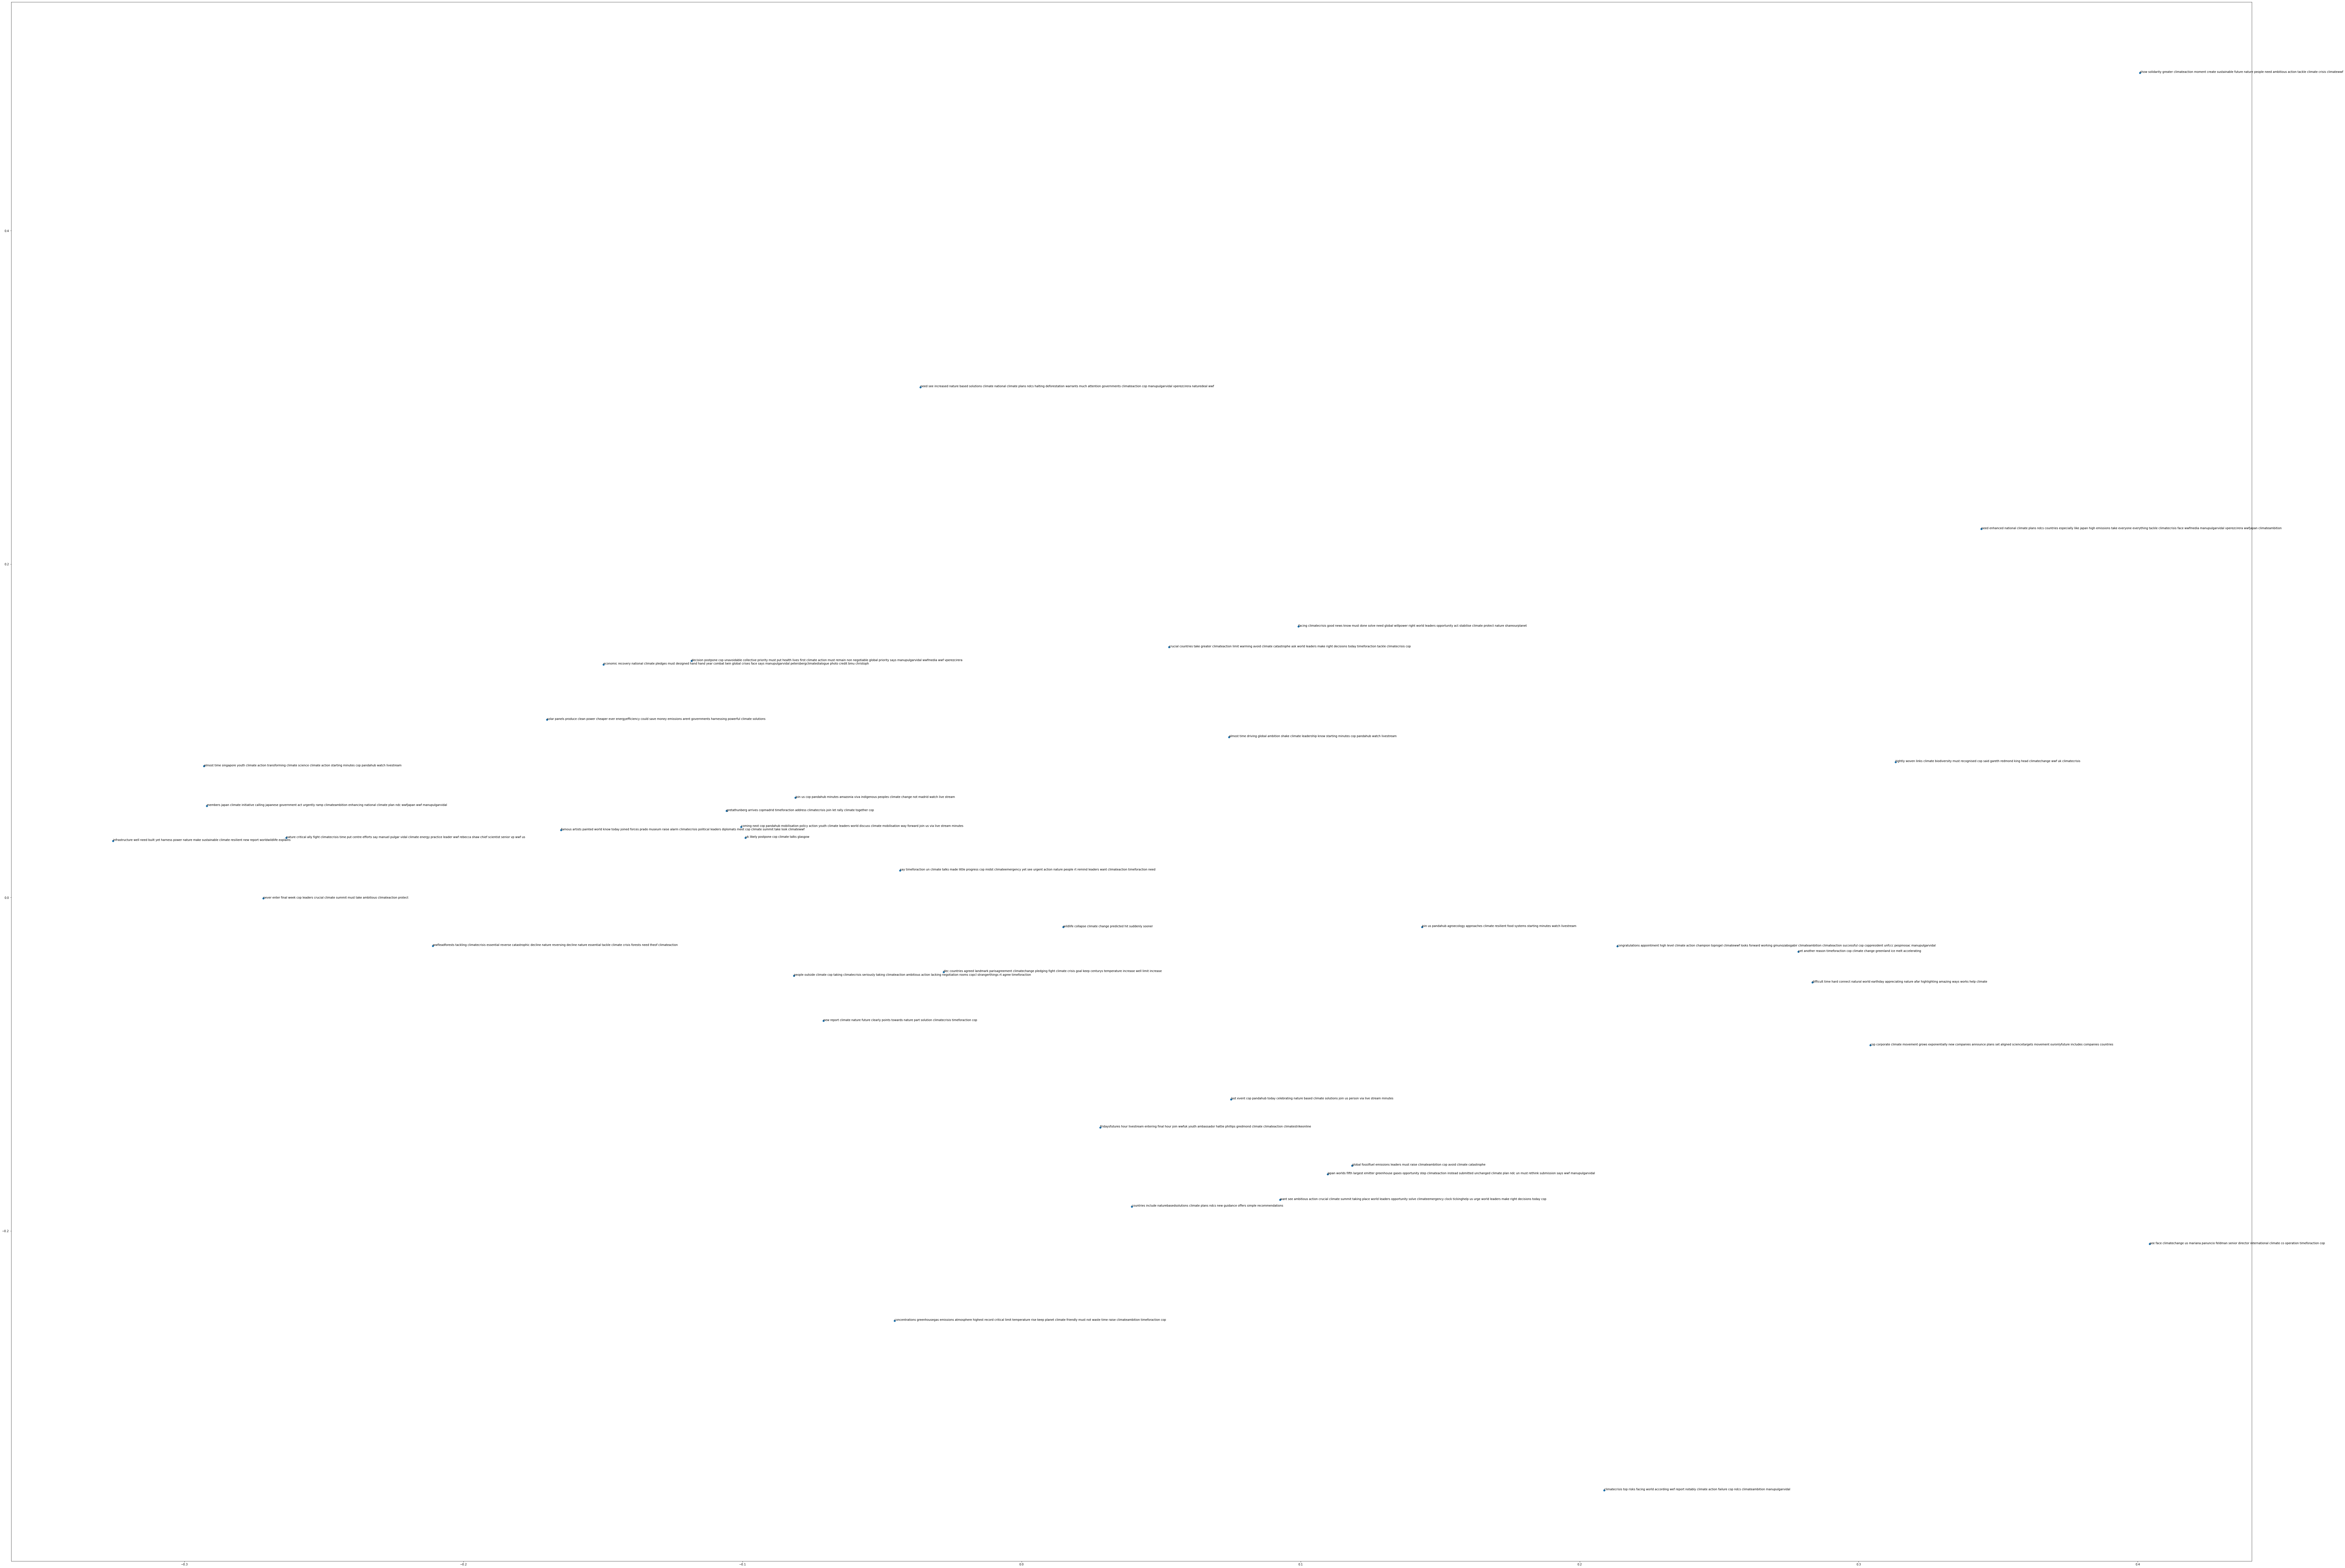

In [127]:
plt.figure(figsize=(140, 100))

pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_train)

plt.scatter(pca_results[:40, 0], pca_results[:40, 1])

for i, text in enumerate(list(tweets.text)[:40]):
    plt.annotate(text[:], xy=(pca_results[i, 0], pca_results[i, 1]))
plt.show()

In [129]:
params = {'C':1, 'max_iter':1000, 'multi_class' :"ovr", 'solver':'saga'}


model = LogisticRegression(**params) # use all CPUs

model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', solver='saga')

In [130]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8636489863926687

Average precision-recall score: 0.94


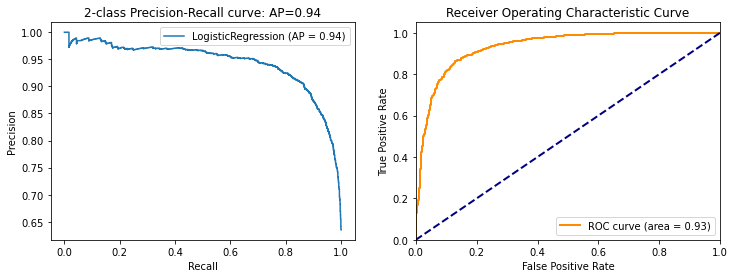

In [132]:
y_score = model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
disp = plot_precision_recall_curve(model, X_test, y_test,ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
axes[0].legend(loc="upper right")


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#plt.figure()
lw = 2
axes[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic Curve')
axes[1].legend(loc="lower right")
plt.show()